# <p style='margin:auto;text-align:center;width:80%;'>MACHINE LEARNING PROJECT FROM THE TITANIC DESASTER DATASET</p>
<p style="text-align:right;font-weight:bold">by TekSo team</p>

<p style='width:100%;height:300px%'><img src='titanic.jpg'></p><br>


*The luxury steamship British RMS Titanic sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.*   
*Titanic has inspired countless books, articles and films, and her story has entered the public consciousness as a cautionary tale about the perils of human hubris.*


### Goal for this project.
This project is to use PyData utilities to analyse the titanic desaster dataset and predict passengers that survived and those that did not.

### This Project is great and insightfull and will give you a walkthrough of:

### Data Handling
 * Importing Data with pandas
 * Cleaning and Wrangling Data with pandas and numpy
 * Visualizing Data with Matplotlib and Seaborn
 
### Data Analysis and Predictive Modelling
   * Logistic Regression
   * Support Vector Machine(SVC) and Linear Support Vector Machine(lSVC)
   * Random Forest Classifier
   * KNeighbor Classifier
   * GaussianNB
   * GradientBoosting Classifier
   * Decision Tree
   * Neural Networks(Deep Learning)
   
### Model Evaluation
   * Using K- folds cross validation
   * sklearn.metric
   * GridSearchCV
   
### Model Optimization
   * Parameter tuning
   * Voting Classifier

Simple css script to create borders arround DataFrames

In [1]:
%%HTML
<style type='text/css'>
table.dataframe td,table.dataframe th{
    border: 1px solid black !important;
    color: black !important;
}
</style>

# Lets us import some Libraries to help us through this Project

In [3]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## NB: Explanation of code's output would be given below the code, this would be done throughout the notebook

In [4]:
print(train_df.info())
print('--'*20)
print('--'*20)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          

##### some observations
* **Numerical Features:** Age(continuous), SibSp(Discrete), Parch(Discrete),Fare(continuous)
* **Categorical Features:** Survived,Pclass,Sex,Embarked
* **Alphanumeric Features:** Cabin, Ticket

##### Data Types of each Feature
* PassengerId, Survived, Pclass, SibSp, Parch - Integer
* Age, Fare - Float
* Name, Sex, Ticket, Cabin, Embarked - String

In [5]:
# Describing categorical variables
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andersson, Master. Sigvard Harald Elias",male,CA. 2343,G6,S
freq,1,577,7,4,644


#### The distribution of categorical features
* The name is unique throughout the dataset, 891 in total.
* The Sex feature has two categorical features(male and female) which has 65% and 35% respectively
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values but we will try our best to work around it.
* The Ticket feature has about 23.57% duplicates. 681 is the unique value.
* Embark feature has three categorical features,(S,C,Q) with S taking about 72% of that feature.

In [6]:
# Describing Numerical Variables
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The distribution of numerical features**
* The age feature has 19% null values. The minimum, maximum and mean age is 5 months,80 years and 30 years respectively
* The highest number of siblings on board is 8 and the minimum is zero
* Among the 891 passengers, the minimum, maximum and average fare is 0.00(legally for crew members),512(the first class passenger(s)) and 14 respectively

# Preview of train and test datasets

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Assumptions based on dataset would be made and as we go through the analyses, we will confirm those assumptions.
1. Female passengers have higher rate of survival than males. So the Sex feature would be maintained.
2. Babies and adults have higher rate of survival. The Age feature may be refined and maintained.
3. Those with siblings and parents would probabily have equal rate of survival as those without.We would check how it correlate the survival and decide whether to drop or maintain.
4. Those having good passenger class may have higher rate of survival than those with low class.
5. The Cabin has many null values. It is assumed that, passengers with cabin number recorded may be of high caliber and therefore would have high rate of survival.
### corrections
4. The Cabin have about 77% of its value missing, we may consider dropping it
5. PassengerId would be dropped because it may contribute no/less to survival so as Ticket.
5. All the other unmentioned features would be reengineered to have good fit for our analysis.

# Lets  Dive into some Data Analysis and Visualization altogether

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Sex feature

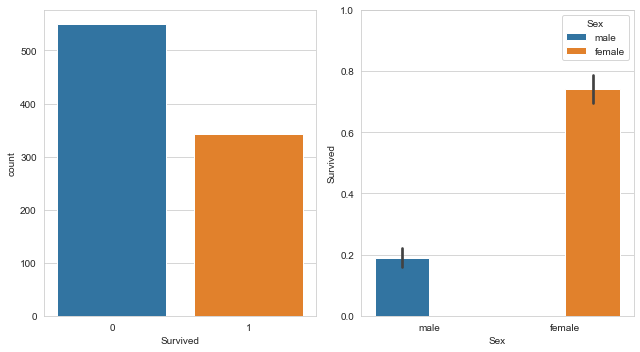

In [10]:
# sns.countplot(x='Survived',data=train_df)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(9,5))
sns.countplot(data=train_df,x='Survived',ax=ax[0])
bar = sns.barplot(data=train_df,x='Sex',y='Survived',ax=ax[1],hue='Sex')
bar.set_ylim(0,1)
plt.tight_layout()

**some observation**
* Those that survived the wreck represent 38.4% against 61.62% of passengers died
* Female has extremely higher rate of survival than the male. This satisfies the assumption no #1

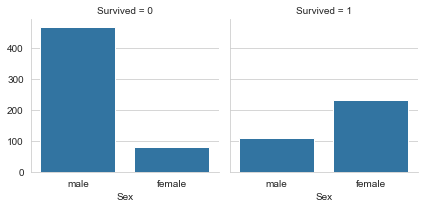

In [11]:
g = sns.FacetGrid(data=train_df,col='Survived')
g.map(sns.countplot,'Sex',order=['male','female'])
plt.tight_layout()

**Some Observation**
* For those that Survived, the female passengers were about twice of male passengers
* Looking at the unsurvived passengers, 85% were male and 15% were female

### Pclass feature

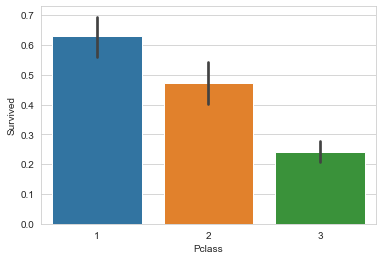

In [12]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

#### some observation
* This is clear that people of higher socio-economic status(first - class) has higher rate of survival compared to second and lastly third-class.
* This confirms the assumption #4

### Parch(Parent and children) and SibSp(Siblings and Spouse) feature

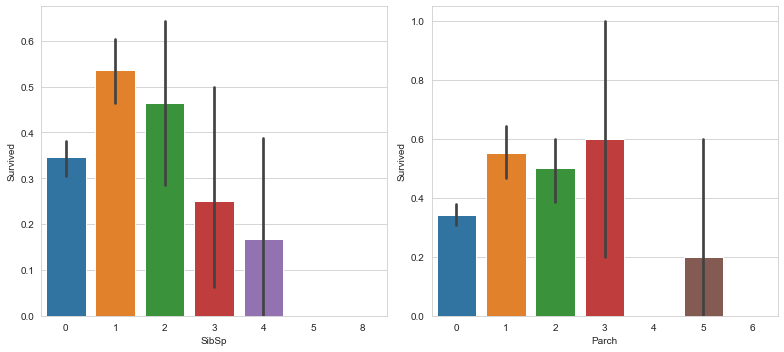

In [13]:
fig,ax = plt.subplots(ncols=2,figsize=(11,5))
sns.barplot(x='SibSp',y='Survived',data=train_df,ax=ax[0])
sns.barplot(x='Parch',y='Survived',data=train_df,ax=ax[1])
plt.tight_layout()

### some observation
* Passengers with one or two siblings/spouse have higher rate of suvival compared to those with less or more.
* Passengers with 1>= parch <=3 have higher rate of survival.
* This answers the assumption #3 but its in contrast with what we thought

### Embarked feature

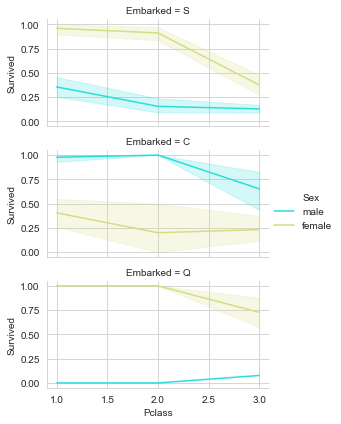

In [14]:
# train_df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values('Survived')
g = sns.FacetGrid(row='Embarked',data=train_df,aspect=2,height=2)
g.map(sns.lineplot,'Pclass','Survived','Sex',palette='rainbow')
g.add_legend()

### some observations
* In the Port Embarkation S and Q, the females have higher rate of survival for the Pclass 1 and 2 but low for Pclass 3.
* Male passengers in port embarkation S with Pclass 1 have higher rate of survival and lower rate for Pclass 2 and 3.
* In contrast, male passengers in port embarkation Q with Pclass 3 have higher rate of survival than those with Pclass 2 and 3.
* Looking at the Port Embarkation C, male passengers have higher rate of survival than female passengers in general.
* In the embarked C, Pclass 1 and 2 as usual has good survival rate than pclass 3 but for the female,pclass 1 and 3 have good Survival rate than Pclass 2.

Decision
* We may cosider Embarked feature also we may want to explore why Embarked C is distinct from the rest.

### Pclass, Age and Fare features

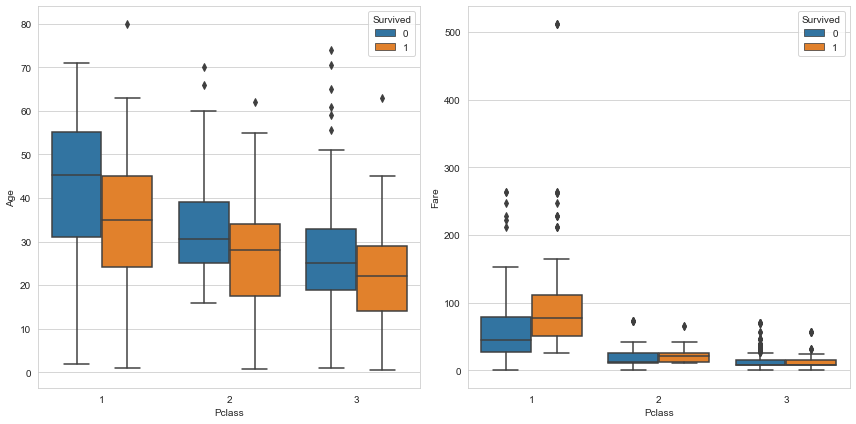

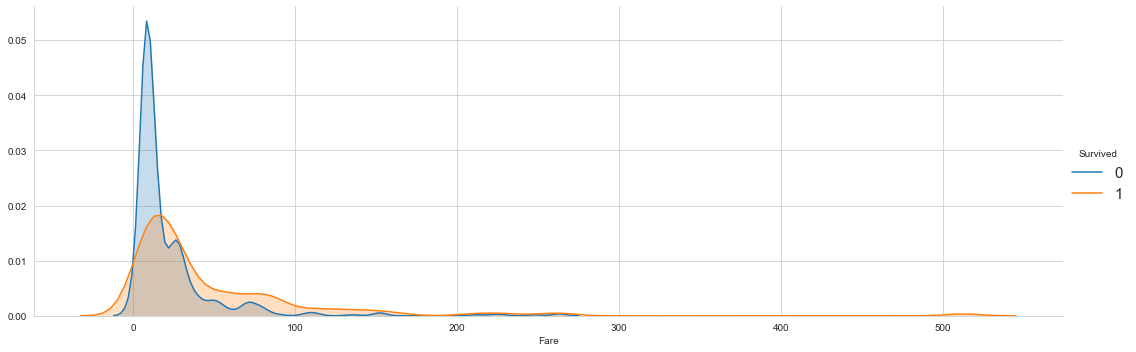

In [15]:
fig,ax = plt.subplots(ncols=2,figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train_df,ax=ax[0],hue='Survived')
sns.boxplot(x='Pclass',y='Fare',data=train_df,ax=ax[1],hue='Survived')
plt.tight_layout()

g = sns.FacetGrid(train_df,hue='Survived',height=5,aspect=3)
p = g.map(sns.kdeplot,'Fare',shade=True)
p.add_legend(fontsize=15)

### some observations
* The maxium and mininum age for Pclass 1 > Pclass 2 >Pclass 3. This is understandable because it takes years to accumulate wealth.
* The average age of those that survived in all the classes is lower than those that did not survive.
* Passengers that survived in the Pclass 1 paid the highest fare. Which concludeds the higher your fare in the pclass 1 the higher your rate of survival.

# <p style="text-align: center;">DATA WRANGLING</p>

# We are going to do the following: correction, correlation,creation and completion.

### We will begin by correlating some categorical features with the survived column to see how they correlate.

In [16]:
def correlate(feature):
    print(train_df[[feature,'Survived']].groupby(feature,as_index=False).mean().sort_values('Survived',ascending=False),'\n\n')


feature_list = ['Pclass','Sex','Embarked','SibSp','Parch']
for feat in feature_list:
    correlate(feat)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363 


      Sex  Survived
0  female  0.742038
1    male  0.188908 


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957 


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000 


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000 




### Some Observation
* Taking the Pclass,Sex,Embarked, there is a good correlation between all the features therefore these are to be maintained.
* But for the SibSp and Parch, we will create new feature out of it.

### we will drop some features that wouldn't contribute to our dataset but in order to make the work much more easier, we will combine the train and test data into one and then split it when done.

In [17]:
# Before droping some features
# Get passenger id for final testing
test_Id = test_df['PassengerId']

# Use divider to separate the combined dataframe after we've perform some operations on it
divider = len(train_df)

# combine the train and test data into combine dataframe to ease our operations
combine_df = pd.concat(objs=[train_df,test_df],axis=0,sort=True).reset_index(drop=True)

print('train data shape {} \n test data shape {} \n combine data shape {} '.format(train_df.shape,test_df.shape,combine_df.shape))


train data shape (891, 12) 
 test data shape (418, 11) 
 combine data shape (1309, 12) 


In [18]:
# dropping some features
combine_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [19]:
# After dropping some features
print('combine_df',combine_df.shape)

combine_df (1309, 10)


In [20]:
#initialize the label encoder
le = LabelEncoder()

# Completion , correction and creation

#### Embarked

In [21]:
# fill Embarked with its modal value
combine_df['Embarked'].fillna(combine_df['Embarked'].mode()[0],inplace=True)

# encode the feature making it numerical
combine_df['Embarked'] = le.fit_transform(combine_df['Embarked'])

#### Sex

In [22]:
# Encode the Sex feature into numerical
# male=1, female=0
combine_df['Sex'] = le.fit_transform(combine_df['Sex'])

#### Fare

In [23]:
combine_df['Fare'].fillna(combine_df['Fare'].mean(),inplace=True)
# cutting the Fare feature into four different bins
combine_df['fare_cat'] = pd.cut(combine_df['Fare'],bins=[-np.inf,8,15,32,np.inf],labels=['A','B','C','D'])
# sns.barplot('fare_cat','Survived',data=train_df)
# correlation between the categorized fare and survived
combine_df[['fare_cat','Survived']].groupby('fare_cat',as_index=False).mean()

,fare_cat,Survived
0,A,0.215768
1,B,0.285714
2,C,0.459459
3,D,0.597156


In [24]:
# encode fare_cat with ordinal numbers
combine_df['fare_cat'] = le.fit_transform(combine_df['fare_cat'])

#### Names

In [25]:
# extract the first word that ends with '.', we use the extract() to get the titles
combine_df['social_rank'] = combine_df['Name'].str.extract(r'([A-Za-z]+)\.',expand=False)
# mapping of titles with more common ones
combine_df['social_rank'].replace(['Lady','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare',inplace=True)
combine_df['social_rank'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'},inplace=True)

In [26]:
#encode it into ordinal machine recognizable format
combine_df['social_rank'] = le.fit_transform(combine_df['social_rank'])

#### Parch and SibSp

In [27]:
# create single feature with the sum of Parch and SibSp
combine_df['single'] = combine_df[['Parch','SibSp']].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
# correlation of single and Survived feature
print('This also satisfy the assumption #3 which turn out to be the contrast of it. Single passengers have lower\
survival rate compared to those who are not.')
combine_df[['single','Survived']].groupby('single',as_index=False).mean()

This also satisfy the assumption #3 which turn out to be the contrast of it. Single passengers have lowersurvival rate compared to those who are not.


,single,Survived
0,0,0.505650
1,1,0.303538


#### Age

In [28]:
train_df['Age'].isna().value_counts(normalize=False)

False    714
True     177
Name: Age, dtype: int64

**Note:** The age feature has 177 nan values which represent 19.8% of the feature.
We have quit handfull approaches of tackline such problem but with this, were going to use both the Sex and Pclass features to complete the Age feature.


In [29]:
for i in range(0,2):
    for j in range(0,3):
        median_age = combine_df[(combine_df['Sex'] == i) & (combine_df['Pclass'] == j+1)]['Age'].median()
        combine_df.loc[(combine_df['Sex'] == i) & (combine_df['Pclass'] == j+1) & (combine_df['Age'].isna()),'Age'] = median_age
combine_df['Age'] = combine_df['Age'].astype('int64')

In [30]:
# Bucketize
bins = [-1, 13, 31, 60, 80]
labels = ['Child', 'Young Adult', 'Adult', 'Elderly']
combine_df['Age'] = pd.cut(combine_df["Age"], bins, labels = labels)

combine_df['Age'] = le.fit_transform(combine_df['Age'])

### cabin feature

The cabin feature has 77% of null values. This qualifies it to be discarded but lets explore it and see if we can satisfy the
assumption #5 and decide the fate of that column.

A barplot showing the rate at which passengers with and without recorded cabin survived per class


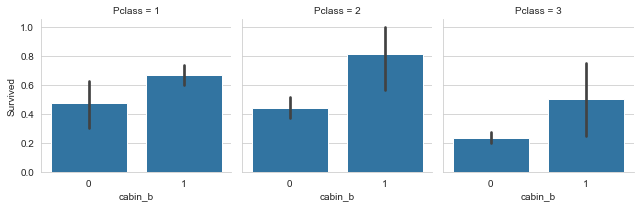

This countplot counts the survived feature by categorizing it in terms of passenger's cabin was recorded or not in each class


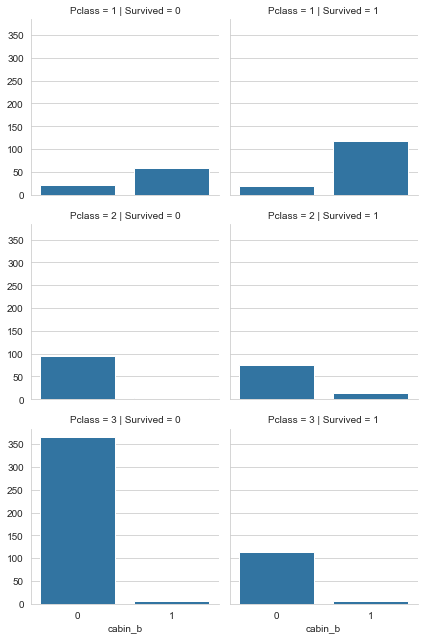

This barplot shows the rate of survival for passengers with recorded and non recorded cabin


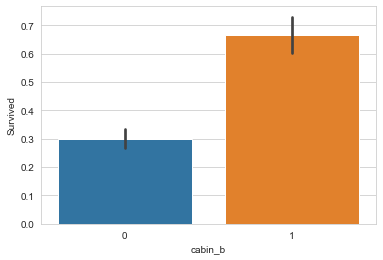

In [31]:
# we create a dataframe and name it cabin_bool
# we add then add cabin_b which is boolean variable of recorded/not recorded

cabin_bool = train_df.copy()
cabin_bool['cabin_b'] = cabin_bool['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

print('A barplot showing the rate at which passengers with and without recorded cabin survived per class')
g = sns.FacetGrid(data=cabin_bool,col='Pclass')
g.map(sns.barplot,'cabin_b','Survived',order=[0,1]);
plt.show()

print('This countplot counts the survived feature by categorizing it in terms of passenger\'s cabin was recorded or not in each class')
g = sns.FacetGrid(data=cabin_bool,col='Survived',row='Pclass')
g.map(sns.countplot,'cabin_b',order=[0,1]);
plt.show()

print('This barplot shows the rate of survival for passengers with recorded and non recorded cabin')
sns.barplot(x='cabin_b',y='Survived',data=cabin_bool);
plt.show()

#### some observation
#### (middle plot)
* In the first class

     + Extremely high number of cabins were recorded in the first-class passengers.
     + Most passengers that had their cabin number recorded survived.
* In the second and third class
     + It turned out that those that  most survived passengers had their cabin number not recorded which is in contrast with the first class.But among those that died,non had their cabin number recorded.This is similar to the third class.
* This satisfy the assumption #5

#### (bottom plot)
* The rate of survival of a passenger with is recorded or non-recorded cabin number is approximately 0.7 and 0.3 respectively.
* This clearly justify the cabin feature to be added to the dataset since it contribute significantly to the Passenger's survival

In [32]:
cabin_bool[['cabin_b','Survived']].groupby('cabin_b').mean().sort_values('Survived',ascending=False)

,Survived
cabin_b,
1,0.666667
0,0.299854


In [33]:
# Now lets add cabin boolean feature to the main dataset
combine_df['Cabin'] = combine_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

### Now, lets drop all unwanted features

In [34]:
combine_df.drop(['Fare','Name','Parch','SibSp'],axis=1,inplace=True)
combine_df['Age'].astype(int)

0       3
1       0
2       3
3       0
4       0
       ..
1304    3
1305    0
1306    0
1307    3
1308    3
Name: Age, Length: 1309, dtype: int32

### Now that we are done with the preprocessing and wrangling, we will separate our data back to the train and test sets then we start our predictive modelling

In [35]:
train_set = combine_df[:divider]
test_set = combine_df[divider:].drop('Survived',axis=1)

In [36]:
train_set.head()

,Age,Cabin,Embarked,Pclass,Sex,Survived,fare_cat,social_rank,single
0,3,0,2,3,1,0.0,0,2,0
1,0,1,0,1,0,1.0,3,3,0
2,3,0,2,3,0,1.0,0,1,1
3,0,1,2,1,0,1.0,3,3,0
4,0,0,2,3,1,0.0,1,2,1


In [37]:
test_set.head()

,Age,Cabin,Embarked,Pclass,Sex,fare_cat,social_rank,single
891,0,0,1,3,1,0,2,1
892,0,0,2,3,0,0,3,0
893,2,0,1,2,1,1,2,1
894,3,0,2,3,1,1,2,1
895,3,0,2,3,0,1,3,0


# LETS START WITH MACHINE LEARNING

### We import all the classifiers that would be used in this section

In [38]:
# Training classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Evaluation Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

# Preprocessor
from sklearn.preprocessing import MinMaxScaler

C:\Users\JOACHIM\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [80]:
X = train_set.drop(['Survived'],axis=1)
y =train_set['Survived']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### Lets scale our input data between a standard range of 0 through 1

In [72]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### First of all, we will train each model separately with its default hyperperimeters and choose the best 5 high performing ones

In [74]:
knn = KNeighborsClassifier().fit(X_train_scaled,y_train)
print('Train ',knn.score(X_train_scaled,y_train))
print('Test ',knn.score(X_test_scaled,y_test))

Train  0.844311377245509
Test  0.8161434977578476


In [76]:
lg = LogisticRegression(solver='lbfgs').fit(X_train_scaled,y_train)
print('Train ',lg.score(X_train_scaled,y_train))
print('Test ',lg.score(X_test_scaled,y_test))

Train  0.7934131736526946
Test  0.7802690582959642


In [79]:
svc = SVC(gamma='auto',kernel='linear').fit(X_train_scaled,y_train)
print('Train ',svc.score(X_train_scaled,y_train))
print('Test ',svc.score(X_test_scaled,y_test))

Train  0.7889221556886228
Test  0.7802690582959642


In [45]:
tree = DecisionTreeClassifier().fit(X_train,y_train)
print('Train ',tree.score(X_train,y_train))
print('Test ',tree.score(X_test,y_test))

Train  0.8727544910179641
Test  0.8251121076233184


In [46]:
forest = RandomForestClassifier(n_estimators=5).fit(X_train_scaled,y_train)
print('Train ',forest.score(X_train_scaled,y_train))
print('Test ',forest.score(X_test_scaled,y_test))

Train  0.8697604790419161
Test  0.8340807174887892


In [47]:
gradient = GradientBoostingClassifier().fit(X_train,y_train)
print('Train ',gradient.score(X_train,y_train))
print('Test ',gradient.score(X_test,y_test))

Train  0.8517964071856288
Test  0.8295964125560538


In [48]:
network = MLPClassifier(max_iter=700).fit(X_train_scaled,y_train)
print('Train ',network.score(X_train_scaled,y_train))
print('Test ',network.score(X_test_scaled,y_test))

Train  0.8368263473053892
Test  0.8071748878923767


In [49]:
naive = GaussianNB().fit(X_train_scaled,y_train)
print('Train ',naive.score(X_train_scaled,y_train))
print('Test ',naive.score(X_test_scaled,y_test))

Train  0.7350299401197605
Test  0.757847533632287


### Now we will evaluate the best 5 of the 8 classifiers. cross validation would be used for this.

In [50]:
knn = KNeighborsClassifier()
np.mean(cross_val_score(knn,X_test_scaled,y_test,cv=5))

0.7296124031007752

In [51]:

tree = DecisionTreeClassifier(random_state=55)
print(np.mean(cross_val_score(tree,X_test,y_test,cv=5)))

0.7613436692506459


In [52]:
forest = RandomForestClassifier(n_estimators=5,random_state=0)
np.mean(cross_val_score(forest,X_test,y_test,cv=5))

0.7659948320413437

In [53]:
gradient = GradientBoostingClassifier()
np.mean(cross_val_score(gradient,X_test,y_test,cv=5))

0.7702325581395348

In [54]:
network = MLPClassifier(max_iter=1000,activation='tanh')
np.mean(cross_val_score(network,X_test_scaled,y_test,cv=5))

0.7837726098191214

### We are going to engage in model Optimization with GridSearchCv on the best 4 Classifiers

In [55]:

from sklearn.metrics import SCORERS
SCORERS.keys()

In [56]:
tree= DecisionTreeClassifier(random_state=0)
values = {'max_depth':[2,3,4,5,6,7,8,9,10]}
tree_grid = GridSearchCV(tree,param_grid=values,scoring='accuracy',cv=4).fit(X_train,y_train)
best_tree_param = tree_grid.best_params_
tree_grid.best_score_
tree_grid.best_estimator_

C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [57]:
values={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'max_depth':[2,3,4,5,6,7,8,9,10],'max_features':[3,4,5,6,7,8]}
forest = RandomForestClassifier(random_state=0)
forest_grid = GridSearchCV(forest,param_grid=values,cv=3).fit(X_train,y_train)
best_forest_param = forest_grid.best_params_
forest_grid.best_score_

0.8263473053892215

In [58]:
forest_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
values={'n_estimators':[100,150,200,250,300,400],'learning_rate':[0.001,0.01,0.1,1,3,5]}
gradient = GradientBoostingClassifier(random_state=0)
gradient_grid = GridSearchCV(gradient,param_grid=values,cv=4,n_jobs=3).fit(X_train,y_train)

best_gradient_param = gradient_grid.best_params_
gradient_grid.best_score_

C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8278443113772455

In [60]:
values = {'alpha':[0.001,0.01, 0.1, 1.0, 5.0],'activation':['relu','logistic','tanh'],'hidden_layer_sizes':[[100,100],[10,10]]}
network = MLPClassifier(max_iter=1000,random_state=0)
network_grid = GridSearchCV(network,param_grid=values,cv=4).fit(X_train,y_train)
best_network_param = network_grid.best_params_
network_grid.best_score_

C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\JOACHIM\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_it

0.8173652694610778

### The best score and params has been attained therefore with this info, we will apply it on Voting Classifier

In [61]:
estimator = [('dtc',tree_grid.best_estimator_),('rfc',forest_grid.best_estimator_),
               ('gbc',gradient_grid.best_estimator_)]

In [62]:
voting_result= VotingClassifier(estimators=estimator,voting='soft',n_jobs=3)
voting_result.fit(X_train,y_train);

In [63]:
voting_result.score(X_test,y_test)

0.8251121076233184

In [64]:
vc2 = VotingClassifier([('VotingClassifier',voting_result),('MLPClassifier',network_grid.best_estimator_)],voting='soft')
vc2.fit(X_train,y_train);

In [65]:
# ,('MLPClassifier',network_grid.best_estimator_)
vc2.score(X_test,y_test)

0.8295964125560538

In [66]:
result_prediction = vc2.predict(test_set)

In [ ]:
# Result submision

In [67]:
pd.DataFrame({'PassengerId':test_Id,'Survived':result_prediction.astype(int)}).to_csv('submision.csv',header=True,index=False)